In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_Width = 50
IMG_height = 50

# paths for dataset
data_path = "Train_Final/leapGestRecog"

# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_Width, IMG_height)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[5, 4, 5, ..., 3, 4, 4],
        [4, 5, 5, ..., 4, 4, 4],
        [7, 5, 6, ..., 4, 4, 4],
        ...,
        [5, 6, 6, ..., 4, 4, 4],
        [4, 5, 5, ..., 3, 4, 4],
        [6, 5, 5, ..., 3, 3, 4]], dtype=uint8),
 array([[4, 6, 4, ..., 4, 4, 3],
        [5, 5, 5, ..., 3, 5, 4],
        [5, 5, 5, ..., 3, 4, 3],
        ...,
        [5, 4, 5, ..., 4, 4, 3],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 3, 3, 4]], dtype=uint8),
 array([[ 4,  5,  4, ...,  4,  4,  4],
        [ 5,  4,  5, ...,  3,  3,  4],
        [ 4,  4,  5, ...,  3,  3,  3],
        ...,
        [ 9, 18, 20, ...,  4,  4,  4],
        [15, 16, 19, ...,  4,  4,  4],
        [10, 14, 19, ...,  4,  4,  3]], dtype=uint8),
 array([[5, 5, 5, ..., 5, 5, 4],
        [7, 6, 7, ..., 6, 6, 5],
        [6, 6, 7, ..., 6, 6, 5],
        ...,
        [6, 6, 6, ..., 5, 6, 6],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 6, 5, ..., 5, 5, 4]], dtype=uint8),
 array([[6, 6, 5, ..., 4, 5, 5],
        [3, 4, 5, ..., 3, 5

In [5]:
label[:10]

[4, 3, 6, 4, 6, 1, 0, 2, 3, 1]

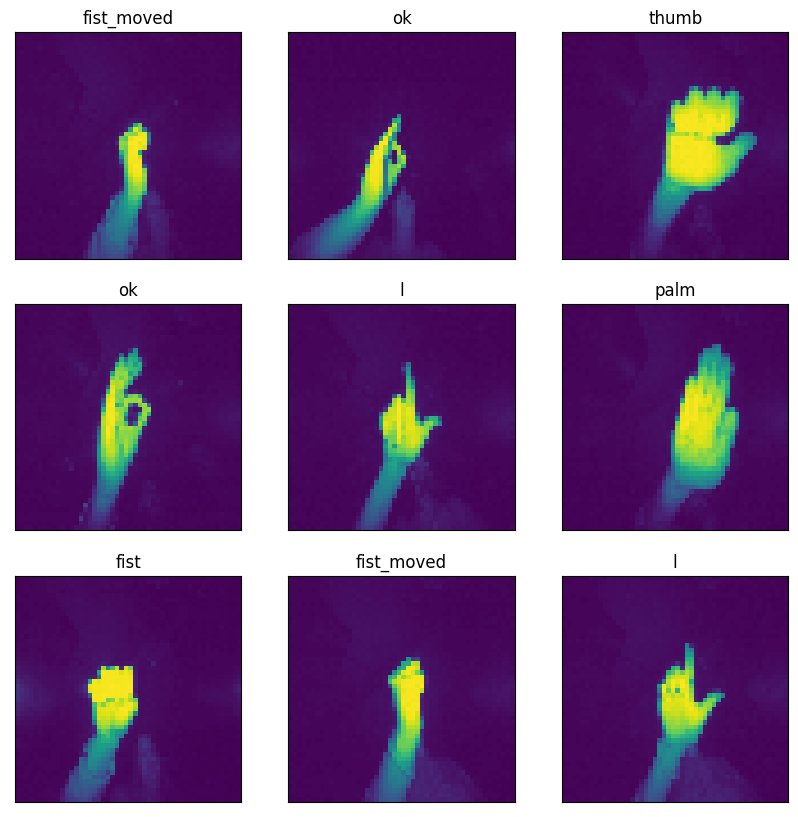

In [6]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0])
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [7]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [8]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [9]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

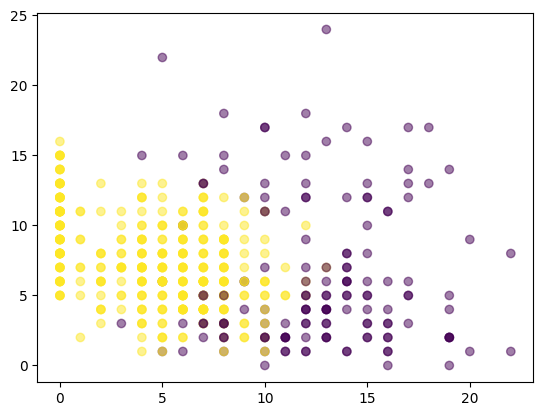

In [9]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

In [10]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [11]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_Width, IMG_height, 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.20, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16000, 50, 50, 1), (16000, 10), (4000, 50, 50, 1), (4000, 10))

In [14]:
model = keras.models.Sequential()

#model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 1)))
###
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(50, 50, 1)))
###
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

######
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
######

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#####
model.add(Dense(128, activation='relu'))
#####
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
         optimizer = 'adam',
         metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

print("Train accuracy:", history.history['accuracy'][-1])
print("Val accuracy:", history.history['val_accuracy'][-1])

print("Train loss:", history.history['loss'][-1])
print("Val loss:", history.history['val_loss'][-1])

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0

In [15]:
# Predict labels for test data
y_pred = model.predict(X_test)

# Convert predicted labels to one-hot encoded format
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import precision_recall_fscore_support

# Assuming you have y_pred_classes and y_test_classes

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

125/125 [==============================] - 0s 2ms/step
Precision: 0.9995025445292621
Recall: 0.9995
F1 Score: 0.9995000410963908


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_test_preds = model.predict(X_test)
Y_test_preds = np.argmax(Y_test_preds, axis=1)

print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, Y_test_preds))
print("\nClassification Report :")
print(classification_report(y_test, Y_test_preds, target_names=class_labels))

125/125 [==============================] - 0s 2ms/step

Confusion Matrix : 


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [17]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer(random_state=123)

explainer

In [20]:
import skimage
from skimage.color import gray2rgb, rgb2gray

def make_prediction(color_img):
    gray_img = rgb2gray(color_img).reshape(-1,50,50,1)
    preds = model.predict(gray_img)
    return preds

In [21]:
colored_image = gray2rgb(X_test[0].squeeze())

preds = make_prediction(colored_image)

preds.shape

1/1 [==============================] - 0s 103ms/step


(1, 10)

In [30]:
from skimage.segmentation import felzenszwalb, flood_fill, flood

rng = np.random.RandomState(42)
idx = rng.choice(range(len(X_test)))

print("Actual Target Value     : {}".format(mapping[y_test[idx]]))
pred = model.predict(X_test[idx:idx+1]).argmax(axis=1)[0]
print("Predicted Target Values : {}".format(mapping[pred]))

explanation = explainer.explain_instance(X_test[idx].squeeze(), make_prediction, random_seed=123)

explanation

NameError: name 'mapping' is not defined

In [26]:
img, mask = explanation.get_image_and_mask(y_test[idx], positive_only=True, hide_rest=True)

img.shape, mask.shape

TypeError: unhashable type: 'numpy.ndarray'

In [34]:
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from PIL import Image

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = Image.open(img_path).resize((50, 50))
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        #x = model.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 [==============================] - 0s 201ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 10)

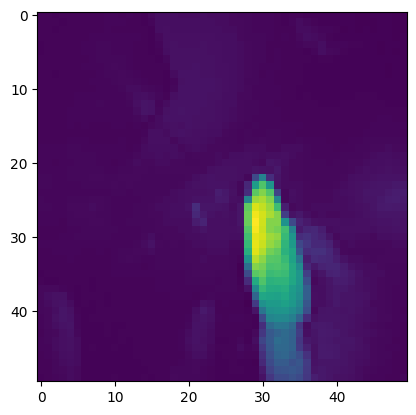

In [35]:
data_path = "Train_Final/leapGestRecog/00/01_palm/"
images = transform_img_fn([os.path.join(data_path, 'frame_00_01_0001.png')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [36]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
explainer = lime_image.LimeImageExplainer()
explainer

In [44]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=100)

  9%|▉         | 9/100 [00:00<00:00, 143.24it/s]


NotFoundError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SHAKIB\AppData\Local\Temp\ipykernel_22060\3321310407.py", line 3, in <module>
      explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=100)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\lime\lime_image.py", line 200, in explain_instance
      batch_size=batch_size)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\lime\lime_image.py", line 261, in data_labels
      preds = classifier_fn(np.array(imgs))
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\activations.py", line 318, in relu
      x, alpha=alpha, max_value=max_value, threshold=threshold
    File "c:\Users\SHAKIB\anaconda3\envs\new_gpu\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
No algorithm worked!  Error messages:
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_28530]

In [45]:
from skimage.segmentation import mark_boundaries

In [46]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

NameError: name 'explanation' is not defined

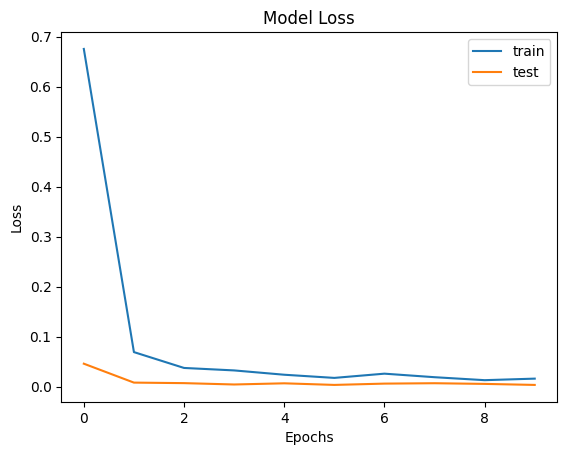

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

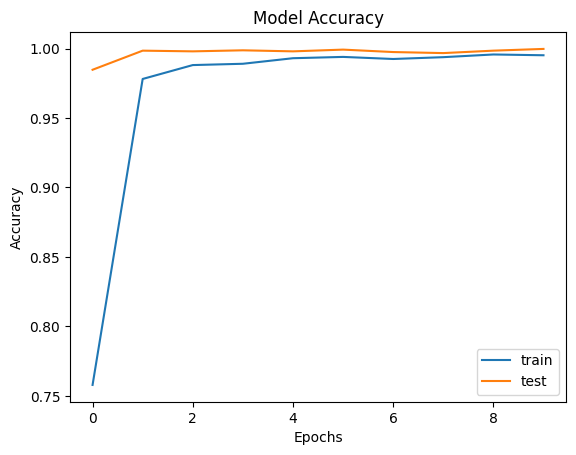

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

125/125 [==============================] - 0s 2ms/step


[]

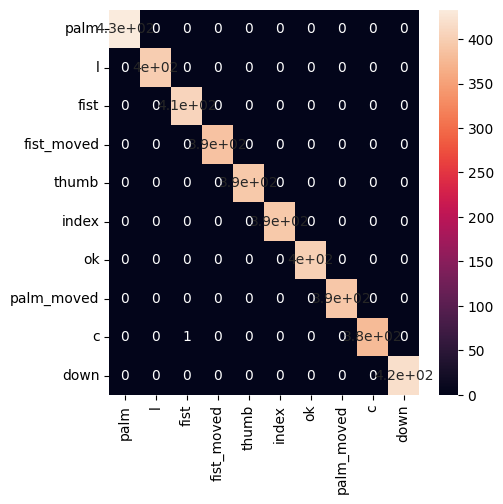

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

125/125 [==============================] - 0s 2ms/step


[]

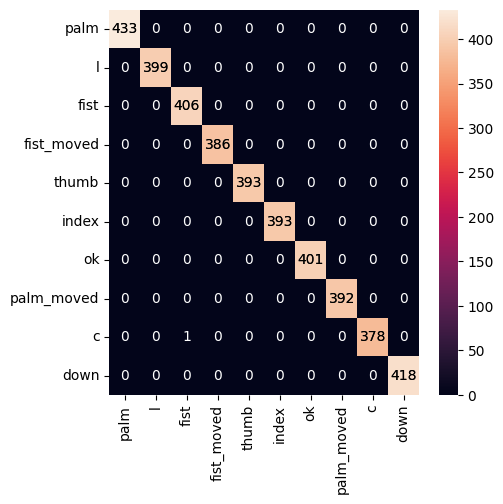

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5, 5))

# Obtain the predicted labels and true labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with annotated values
sn.heatmap(cm, annot=True, xticklabels=cat, yticklabels=cat, fmt='d')

# Add the numerical values of the diagonal (true positives) inside the plot
for i in range(len(cat)):
    plt.text(i + 0.5, i + 0.5, cm[i, i], ha='center', va='center', color='black', fontsize=10)

plt.plot()


AIX (SHAP)

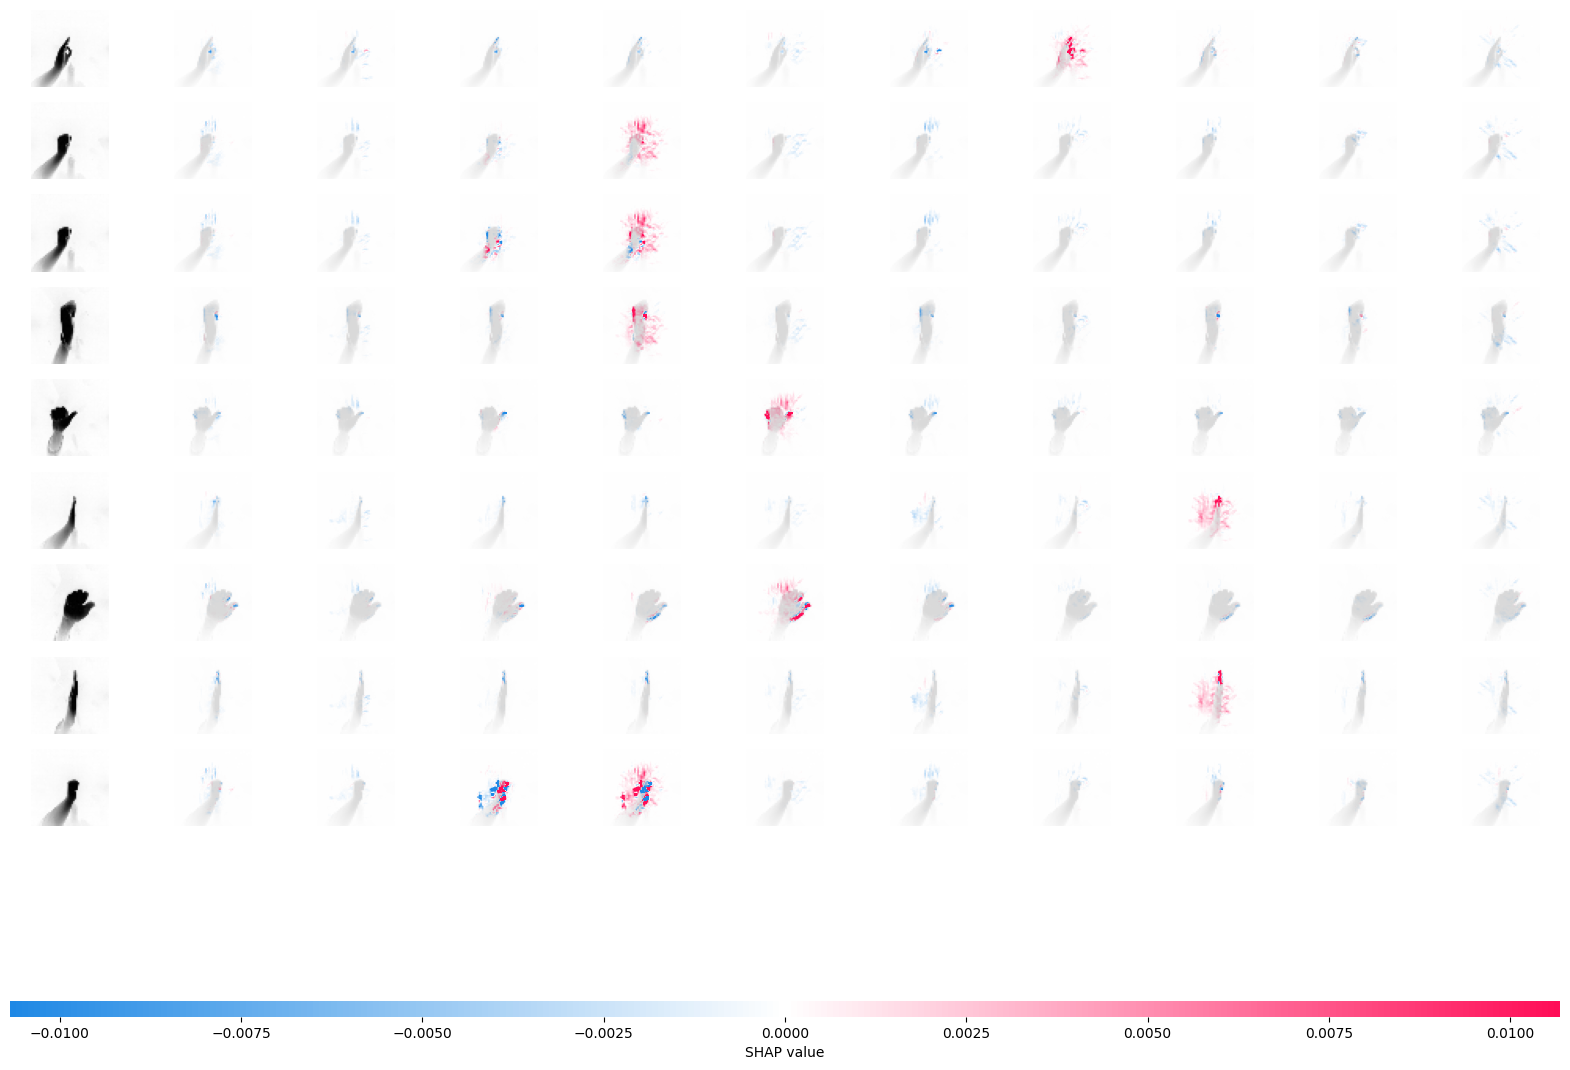

In [ ]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on nine images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:10])

# plot the feature attributions
shap.image_plot(shap_values, -X_test[1:10])